# Project 2

_Please read the handout for Project 2 on BrightSpace. Feel free to add new cells if necessary._

Dataset (available on Vocareum) was download from here: https://github.com/srviest/movie-recommender/tree/master/dataset/movielens/small

__Please make sure you have tested your code to be working on Vocareum__

__Due by Sunday, Apr 4, 11:59pm__

# 1: Transforming Data

In [20]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import *

ratings = pd.read_csv("ratings.csv")
ratings = ratings.drop('timestamp', axis=1).pivot(index='userId', columns='movieId').reset_index()
ratings.columns = ratings.columns.droplevel(0)
ratings = ratings.drop('', axis=1)
ratings = ratings.fillna(0)
ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2: Principle Component Analysis

In [21]:
rscaled = pd.DataFrame(preprocessing.scale(ratings.transpose(), with_std=False))
rscaled
ratings.transpose().reset_index().movieId

0            1
1            2
2            3
3            4
4            5
         ...  
9061    161944
9062    162376
9063    162542
9064    162672
9065    163949
Name: movieId, Length: 9066, dtype: int64

In [22]:
pca = decomposition.PCA(n_components=2)
pca.fit(rscaled)
rtrans = pd.DataFrame(pca.transform(rscaled), columns=['pc1', 'pc2'])
rtrans

,pc1,pc2
0,39.475982,6.574556
1,14.589369,2.858288
2,4.257624,-1.533101
3,-1.106876,-0.476500
4,5.383068,-1.095117
...,...,...
9061,-2.192232,0.633707
9062,-1.737633,1.018121
9063,-2.352035,0.358787
9064,-2.365249,0.334555


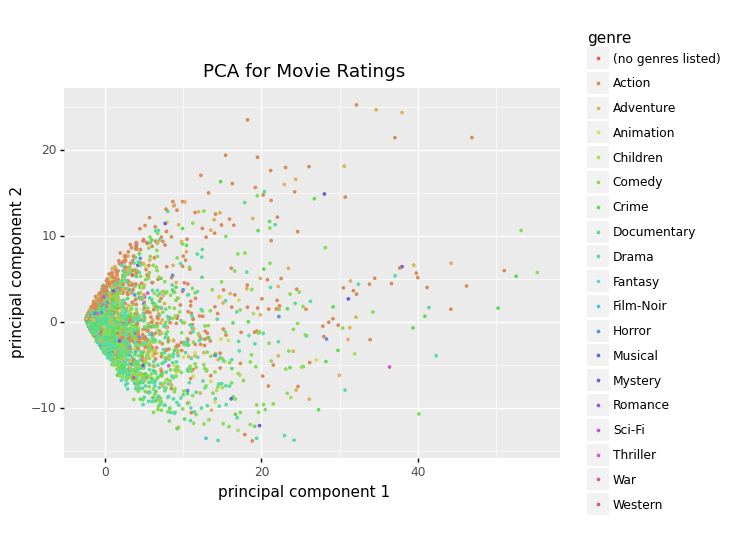

<ggplot: (8766582729629)>

In [23]:
movies = pd.read_csv('movies.csv')
movies.genres = movies.genres.apply(lambda x: x.split('|')[0])
rtrans['genre'] = ratings.transpose().reset_index().movieId
rtrans.genre.replace(movies.set_index('movieId').genres.to_dict(), inplace=True)

ggplot(data=rtrans, mapping=aes(x='pc1', y='pc2', color='genre')) + geom_point(size=.5) + labs(x="principal component 1", y="principal component 2", title="PCA for Movie Ratings")


The data seems to have a conic structure as limits stemming from somewhere around (-2, 0) and is very dense around this point and a lot less dense as the points are further from it.

In [24]:
pca.explained_variance_

for x in range(0, 200, 20):
    pca = decomposition.PCA(n_components=x)
    pca.fit(rscaled)
    if (pca.explained_variance_ratio_.sum() > .8):
        for y in range(x-20, x):
            pca = decomposition.PCA(n_components=y)
            pca.fit(rscaled)
            if (pca.explained_variance_ratio_.sum() > .8):
                print("You would need {} features to explain {} percent of the varience".format(y, pca.explained_variance_ratio_.sum()))
                break

You would need 177 features to explain 0.8012496344849884 percent of the varience


Because you would need 176 features to explain 80% of the data and we only use 2 features in the graph it may be difficult to draw conclusions about the data from this visualization.

# 3: Clustering

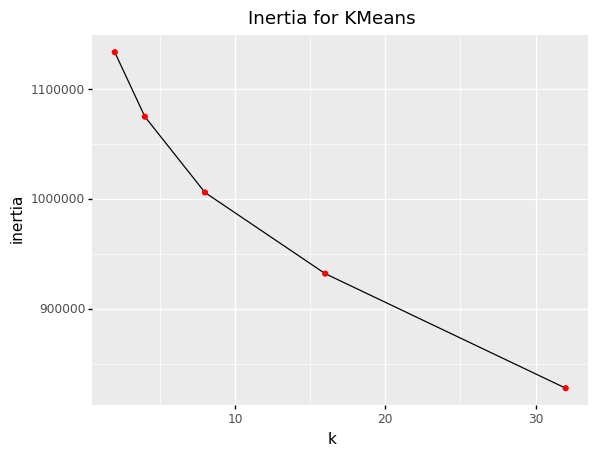

<ggplot: (8766586750389)>

In [25]:
k = [2, 4, 8, 16, 32]
i = []
for x in k:
    kmeans = cluster.KMeans(x)
    rslt = kmeans.fit(ratings)
    i.append(rslt.inertia_)
inertias = pd.DataFrame({'k':k, 'inertia':i})
ggplot(data=inertias, mapping=aes(x='k', y='inertia')) + geom_line() + geom_point(color='red') + ggtitle("Inertia for KMeans")

In [26]:
k=8

Using k=8 will work for a value of k well because it is the largest elbow shown on the graph. This will make a good exchange of complexity and speed so that there are not too many groups but also enough that they represent the data well.

In [27]:
kmeans = cluster.KMeans(k)
rslt = kmeans.fit(ratings)

In [28]:
ratings['group'] = rslt.labels_
df = pd.DataFrame(ratings.groupby('group').mean().apply(lambda x: x.nlargest(3).index.tolist(), axis=1).to_list(), columns=['Movie 1', 'Movie 2', 'Movie 3'])
df.replace(movies.set_index('movieId').title)

,Movie 1,Movie 2,Movie 3
0,Raiders of the Lost Ark (Indiana Jones and the...,"Godfather, The (1972)",Star Wars: Episode IV - A New Hope (1977)
1,"Shawshank Redemption, The (1994)",Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994)
2,Sense and Sensibility (1995),Taxi Driver (1976),Flirting With Disaster (1996)
3,Fargo (1996),Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...
4,"Fugitive, The (1993)",Pulp Fiction (1994),Dances with Wolves (1990)
5,"Matrix, The (1999)","Lord of the Rings: The Fellowship of the Ring,...",Forrest Gump (1994)
6,Copycat (1995),Leaving Las Vegas (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) ...
7,Léon: The Professional (a.k.a. The Professiona...,Fight Club (1999),Pulp Fiction (1994)


These seem like relatively recognizable groups, and while there is some overlap we can expect some overlap in the top 3 most liked movies amongst these groups. I think that the only suprising value is that Pulp Fiction is number 3 in group 2, 3, and 4 but it falls well into each of these groups.

# 4: Singular Value Decomposition

In [29]:
U, s, Vt = np.linalg.svd(ratings)
print(U.shape, s.shape, Vt.shape)
(s[:x]**2 / (s**2).sum()).sum()

(671, 671) (671,) (9067, 9067)


0.4969851316860191

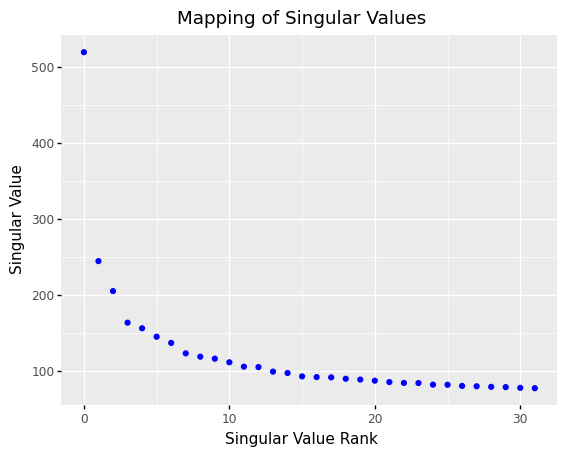

<ggplot: (8766580712623)>

In [30]:
x = pd.DataFrame(s[:32], columns = ['y'])
x['x'] = range(0, 32)
ggplot(data=x, mapping=aes(x='x', y='y')) + geom_point(color = 'blue') + labs(x="Singular Value Rank", y="Singular Value", title="Mapping of Singular Values")

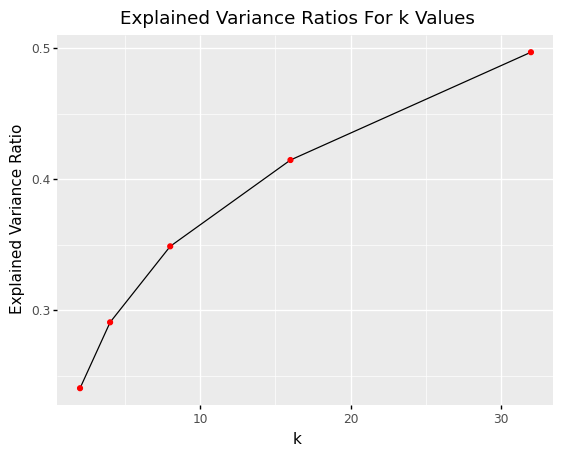

<ggplot: (8766580712545)>

In [31]:
k = [2, 4, 8, 16, 32]
evr = []
for x in k:
    evr.append((s[:x]**2 / (s**2).sum()).sum())
df = pd.DataFrame({'k':k, 'evr':evr})
ggplot(data=df, mapping=aes(x='k', y='evr')) + geom_line() + geom_point(color='red') + labs(y="Explained Variance Ratio", title="Explained Variance Ratios For k Values")

These results are very small compared to the inirtia results and are growing at a decreasing rate. The graph looks like the inirtia graph was flipped upside down and had different axes. 

In [26]:
svd = decomposition.TruncatedSVD(n_components=2)
svd.fit(ratings)
result = svd.transform(ratings)
df = pd.DataFrame(result, columns=['x','y'])

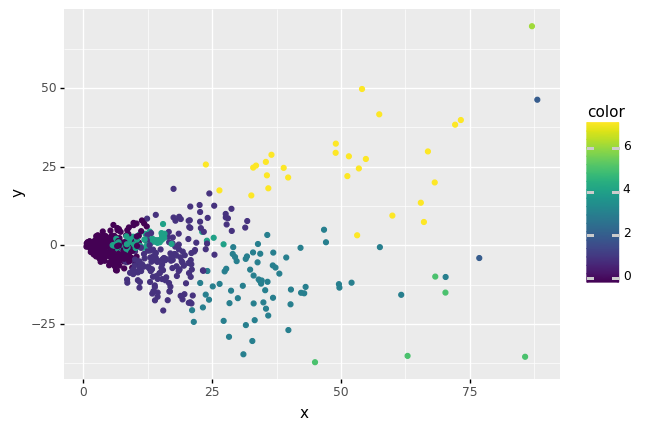

<ggplot: (8731376596553)>

In [29]:
df['color'] = ratings['group']
ggplot(data=df, mapping=aes(x='x',y='y', color='color')) + geom_point()

This plot has groupings that are a lot better defined than those of the PCA graph and it is a lot easier to tell where groups start and end with this graph. Like the last graph there seems to be a cone that starts around (0, 0) and grows into the positive x axis with more density around the point of the cone and less density as it gets farther from that point.